In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv("Retail_Sales_Data.csv")
data.head()

,Transaction_ID,Customer_ID,State,Age,Shop_Category,Sales,Gender,Items_in_basket
0,1,1234,MP,10,Grocery,10,M,2
1,2,1235,UP,21,Dairy,30,F,3
2,3,1236,AP,23,Deli,23,F,4
3,4,1237,RP,25,Meat,21,F,4
4,5,1238,DP,27,Clothes,90,F,3


In [3]:
# Step 2: Explore the Dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction_ID   312 non-null    int64 
 1   Customer_ID      312 non-null    int64 
 2   State            312 non-null    object
 3   Age              312 non-null    int64 
 4   Shop_Category    312 non-null    object
 5   Sales            312 non-null    int64 
 6   Gender           312 non-null    object
 7   Items_in_basket  312 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 19.6+ KB
None


In [4]:
print(data.describe())

       Transaction_ID  Customer_ID         Age       Sales  Items_in_basket
count      312.000000   312.000000  312.000000  312.000000       312.000000
mean       156.500000  7402.195513   47.730769  212.967949         4.336538
std         90.210864  3696.357257   21.572683  140.071728         2.343263
min          1.000000  1234.000000   10.000000   10.000000         2.000000
25%         78.750000  2344.000000   30.000000   92.000000         3.000000
50%        156.500000  9886.000000   43.500000  189.500000         4.000000
75%        234.250000  9934.000000   63.250000  301.250000         5.000000
max        312.000000  9990.000000  104.000000  709.000000        23.000000


In [6]:
data.isnull().sum()

Transaction_ID     0
Customer_ID        0
State              0
Age                0
Shop_Category      0
Sales              0
Gender             0
Items_in_basket    0
dtype: int64

In [7]:
# Step 3: Identify Relevant Variables
print(data.columns)

Index(['Transaction_ID', 'Customer_ID', 'State', 'Age', 'Shop_Category',
       'Sales', 'Gender', 'Items_in_basket'],
      dtype='object')


In [9]:
# Step 4: Group by Region and Calculate Total Sales

total_sales_by_region = data.groupby('State')['Sales'].sum().reset_index()

total_sales_by_region = total_sales_by_region.sort_values(by='Sales', ascending=False)
print(total_sales_by_region)

  State  Sales
1    DP  23346
0    AP  12176
4    RP  11049
2    KP  10887
3    MP   4916
5    UP   4072


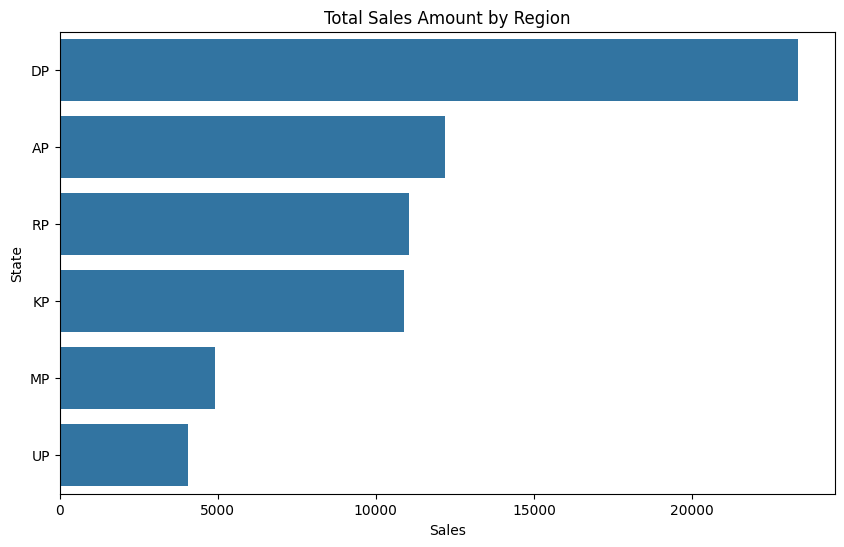

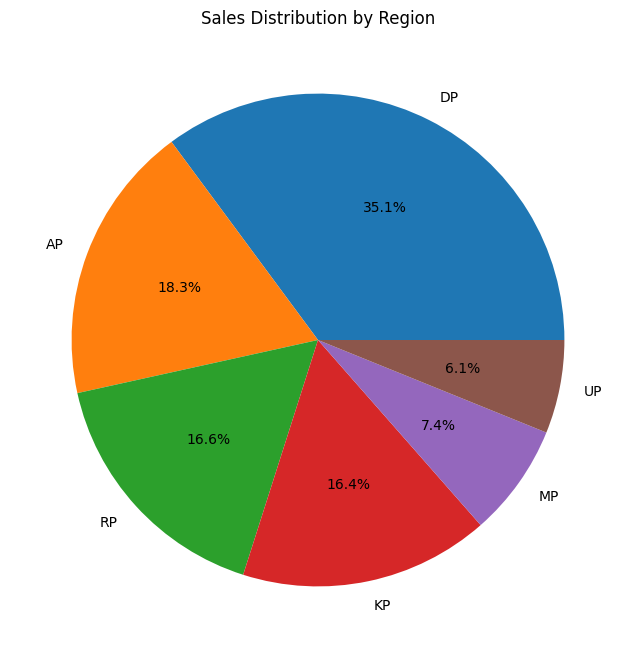

In [12]:
# Step 5: Visualize Sales Distribution by Region

import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for total sales by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='State', data=total_sales_by_region)
plt.title('Total Sales Amount by Region')
plt.xlabel('Sales')
plt.ylabel('State')
plt.show()

# Alternatively, create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_sales_by_region['Sales'], labels=total_sales_by_region['State'], autopct='%1.1f%%')
plt.title('Sales Distribution by Region')
plt.show()

In [17]:
# Step 6: Identify Top-Performing Regions

top_regions = total_sales_by_region.head(5)  # Adjust number as needed
print("Top Performing Regions:")
print(top_regions)

Top Performing Regions:
  State  Sales
1    DP  23346
0    AP  12176
4    RP  11049
2    KP  10887
3    MP   4916


In [20]:
# Step 7: Group by Region and Product Category

total_sales_by_region_category = data.groupby(['State', 'Shop_Category'])['Sales'].sum().unstack(fill_value=0)

# Display the result
print(total_sales_by_region_category)

Shop_Category  Clothes  Dairy  Deli  Electronics  Grocery  Meat
State                                                          
AP                2127   1197  1303         3818      823  2908
DP                7133   6027  1723         4645     1736  2082
KP                3581    630  2595         2742       54  1285
MP                 711      0  1144          696      950  1415
RP                2167     74  1006         3087     2452  2263
UP                1077    816    87          500      729   863


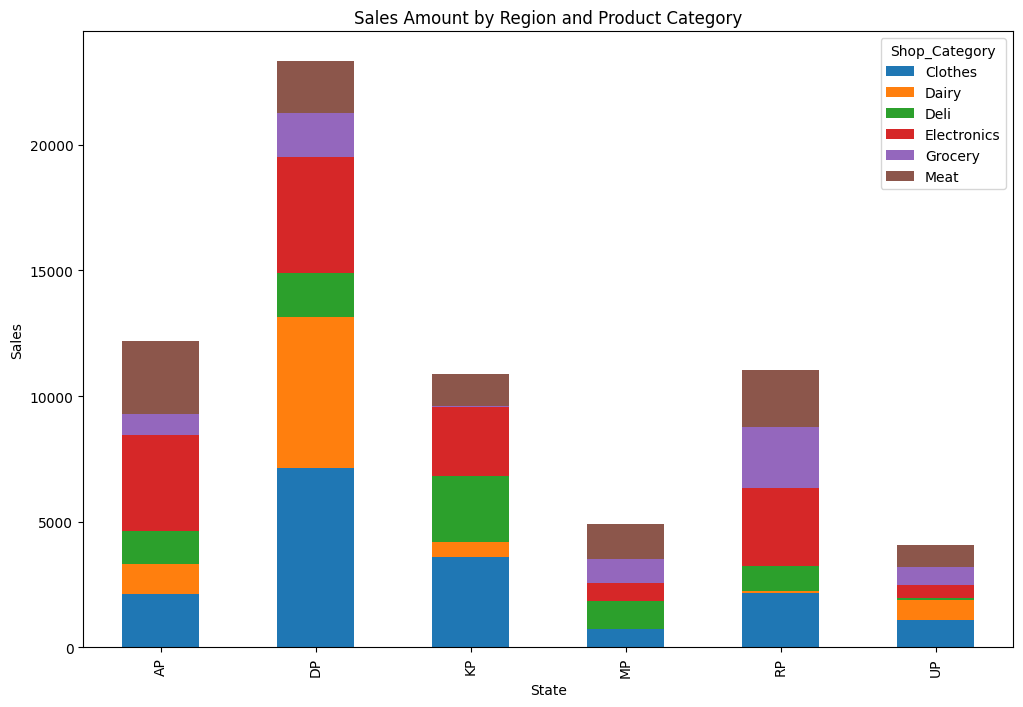

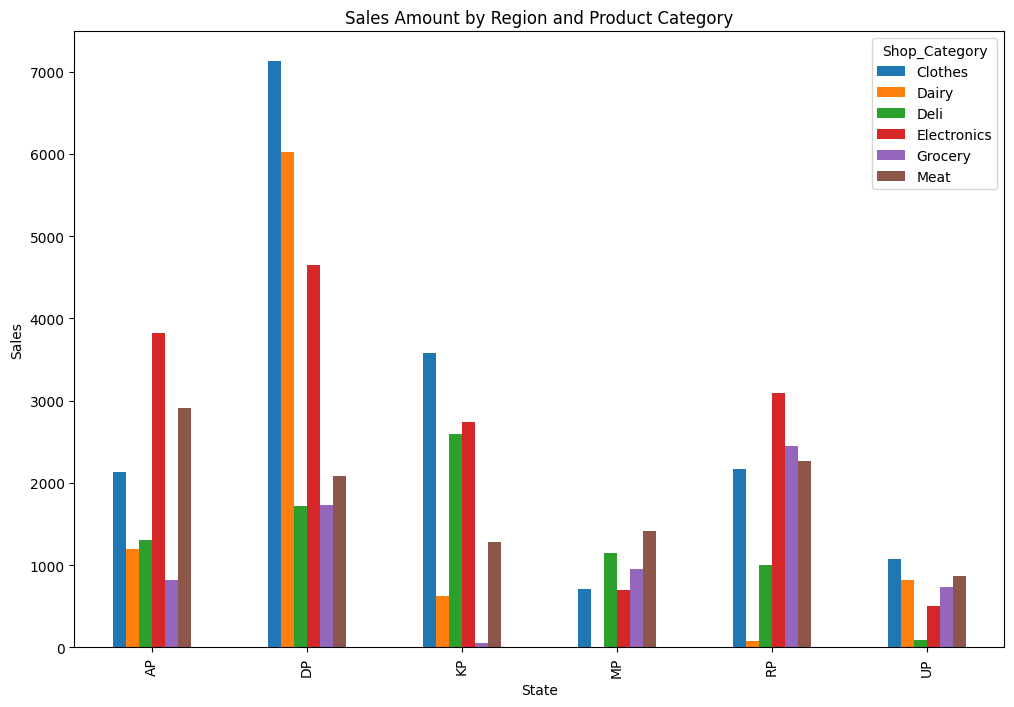

In [21]:
# Step 8: Create Stacked/Grouped Bar Plots

total_sales_by_region_category.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sales Amount by Region and Product Category')
plt.xlabel('State')
plt.ylabel('Sales')
plt.legend(title='Shop_Category')
plt.show()

# Alternatively, create a grouped bar plot
total_sales_by_region_category.plot(kind='bar', figsize=(12, 8))
plt.title('Sales Amount by Region and Product Category')
plt.xlabel('State')
plt.ylabel('Sales')
plt.legend(title='Shop_Category')
plt.show()